In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("breast_cancer1.csv")

df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [27]:
# construindo o modelo

X = df.drop(columns=["diagnosis", "id"])
y = df["diagnosis"]

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42, stratify=y)

In [5]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=3000).fit(X_train, y_train)

In [6]:
modelo.intercept_

array([-15.25744606])

In [7]:
modelo.coef_

array([[-0.85773823, -0.18118989,  0.15238009, -0.01369146,  0.09281505,
         0.13780385,  0.29440588,  0.16054725,  0.1433678 ,  0.01768473,
         0.00859162, -0.79538875,  0.11650778,  0.06659562,  0.01549237,
        -0.01810781,  0.04389157,  0.02613828,  0.03237634, -0.00393287,
        -0.32838492,  0.37173062,  0.04072742,  0.01718771,  0.13317278,
         0.2222655 ,  0.55244704,  0.27197854,  0.38586552,  0.02876565]])

In [8]:
modelo.feature_names_in_

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'], dtype=object)

In [9]:
pd.DataFrame(modelo.coef_[0], index=modelo.feature_names_in_, columns=["parametros"])

,parametros
radius_mean,-0.857738
texture_mean,-0.181190
perimeter_mean,0.152380
area_mean,-0.013691
smoothness_mean,0.092815
compactness_mean,0.137804
concavity_mean,0.294406
concave points_mean,0.160547
symmetry_mean,0.143368
fractal_dimension_mean,0.017685


In [10]:
# predições com o modelo criado

modelo.predict(X_test)

array(['B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B',
       'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B

In [11]:
y_prob_pred = modelo.predict_proba(X_test)

y_prob_pred

array([[9.98644755e-01, 1.35524522e-03],
       [2.34759287e-05, 9.99976524e-01],
       [9.70780457e-01, 2.92195428e-02],
       [1.43647321e-06, 9.99998564e-01],
       [4.57656357e-10, 1.00000000e+00],
       [8.43187294e-01, 1.56812706e-01],
       [9.94529374e-01, 5.47062613e-03],
       [9.98461944e-01, 1.53805573e-03],
       [4.18099043e-01, 5.81900957e-01],
       [9.15660088e-05, 9.99908434e-01],
       [1.03916875e-13, 1.00000000e+00],
       [2.46758169e-12, 1.00000000e+00],
       [9.86221332e-01, 1.37786676e-02],
       [1.04072240e-09, 9.99999999e-01],
       [9.98229771e-01, 1.77022889e-03],
       [2.53353623e-04, 9.99746646e-01],
       [9.67614612e-01, 3.23853877e-02],
       [9.98933268e-01, 1.06673186e-03],
       [9.99831233e-01, 1.68767187e-04],
       [9.57204932e-01, 4.27950675e-02],
       [9.98695308e-01, 1.30469206e-03],
       [9.24600840e-01, 7.53991600e-02],
       [9.88234368e-01, 1.17656320e-02],
       [9.97624918e-01, 2.37508199e-03],
       [9.941062

In [12]:
np.set_printoptions(suppress=True)

In [13]:
y_prob_pred.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [14]:
modelo.classes_

array(['B', 'M'], dtype=object)

In [15]:
y_prob_M = y_prob_pred[:, 1]

y_prob_M

array([0.00135525, 0.99997652, 0.02921954, 0.99999856, 1.        ,
       0.15681271, 0.00547063, 0.00153806, 0.58190096, 0.99990843,
       1.        , 1.        , 0.01377867, 1.        , 0.00177023,
       0.99974665, 0.03238539, 0.00106673, 0.00016877, 0.04279507,
       0.00130469, 0.07539916, 0.01176563, 0.00237508, 0.0058938 ,
       0.00354863, 0.00904737, 0.53079151, 0.1388642 , 0.0096728 ,
       0.0312883 , 0.99982904, 0.00254647, 0.99999999, 0.11224701,
       0.0010058 , 0.07695683, 0.00020179, 0.02413921, 1.        ,
       0.90543137, 0.01837057, 0.99976956, 1.        , 0.0793969 ,
       0.0045417 , 0.00057026, 0.010506  , 0.99999943, 0.99956902,
       0.00009226, 0.02572542, 0.01010204, 0.00013192, 0.98870126,
       0.99274667, 0.97518137, 0.99886043, 0.01725432, 0.08610813,
       0.13858792, 0.02394338, 0.00351832, 0.00007471, 0.02256299,
       0.0249424 , 0.98812683, 0.00301437, 0.04052002, 0.99999606,
       0.04277964, 0.70696445, 0.02270798, 0.00418812, 0.99999

In [16]:
# Probabilidade da classe M

y_prob = modelo.predict_proba(X_test)[:, 1]

In [17]:
np.where(y_prob >= 0.5, "M", "B")

array(['B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B',
       'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B

In [18]:
modelo.predict(X_test)

array(['B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B',
       'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B

In [22]:
y_pred = modelo.predict(X_test)


In [23]:
# avaliação do modelo

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[247,   3],
       [ 16, 133]], dtype=int64)

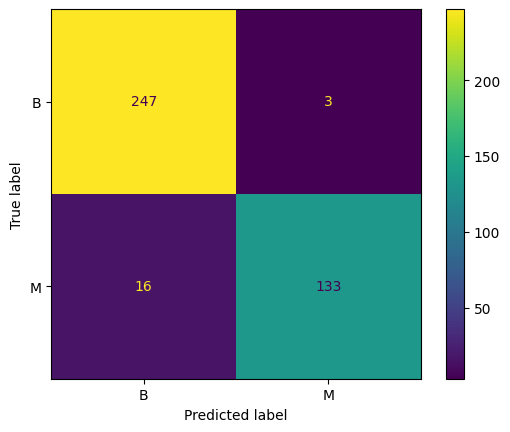

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.94      0.99      0.96       250
           M       0.98      0.89      0.93       149

    accuracy                           0.95       399
   macro avg       0.96      0.94      0.95       399
weighted avg       0.95      0.95      0.95       399

